<Figure size 864x504 with 0 Axes>

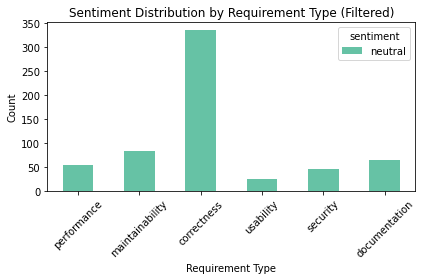

Total Count per Requirement Type (Filtered):


,Requirement Type,Count
0,performance,54
1,maintainability,84
2,correctness,334
3,usability,26
4,security,47
5,documentation,65


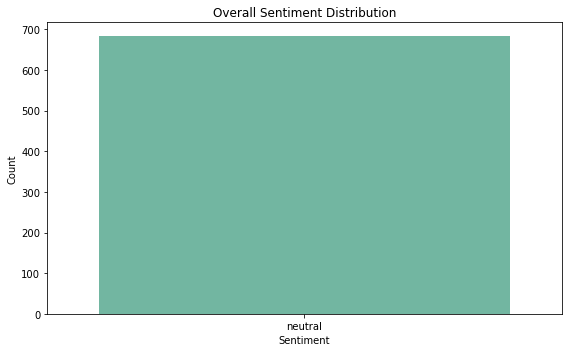

Total Sentiment Counts:


,Sentiment,Count
0,neutral,683


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------
# 1. Read and parse the JSONL file
# ------------------------
parsed_data = []
with open("nfrs_sentiment.json", "r", encoding="utf-8") as f:
    for line in f:
        full_entry = json.loads(line)
        inner_response = json.loads(full_entry["response"])
        inner_response["sentiment"] = full_entry["sentiment"]
        inner_response["confidence"] = full_entry["confidence"]
        parsed_data.append(inner_response)

# ------------------------
# 2. Create the DataFrame
# ------------------------
df = pd.DataFrame(parsed_data)

# ------------------------
# 3. Filter by target requirement types
# ------------------------
target_types = [
    "performance",
    "maintainability",
    "correctness",
    "usability",
    "security",
    "documentation"
]

filtered_df = df[df["type"].isin(target_types)]

# ------------------------
# 4. Count sentiment occurrences per type
# ------------------------
sentiment_counts = filtered_df.groupby(["type", "sentiment"]).size().unstack(fill_value=0)
sentiment_counts = sentiment_counts.reindex(target_types, fill_value=0)  # keep original order

# ------------------------
# 5. Stacked bar chart: Sentiment distribution per requirement type
# ------------------------
plt.figure(figsize=(12, 7))
sentiment_counts.plot(kind="bar", stacked=True, colormap=plt.get_cmap("Set2"))
plt.title("Sentiment Distribution by Requirement Type (Filtered)")
plt.xlabel("Requirement Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------
# 6. Table: total count per type
# ------------------------
type_counts = df["type"].value_counts().loc[target_types].reset_index()
type_counts.columns = ["Requirement Type", "Count"]

print("Total Count per Requirement Type (Filtered):")
display(type_counts)

# ------------------------
# 7. New bar chart: Total sentiment distribution
# ------------------------
total_sentiments = df["sentiment"].value_counts().reset_index()
total_sentiments.columns = ["Sentiment", "Count"]

plt.figure(figsize=(8, 5))
sns.barplot(data=total_sentiments, x="Sentiment", y="Count", palette="Set2")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("Total Sentiment Counts:")
display(total_sentiments)


In [6]:
sentimentNFR

Contagem por Tipo de Requisito:


,Tipo de Requisito,Quantidade
0,maintainability,120
1,performance,88
2,security,73
3,functional,16
4,operational,16
...,...,...
113,formatting,1
114,testability,1
115,data mapping,1
116,code_change,1


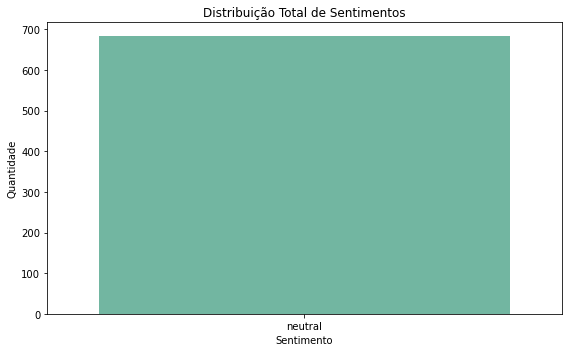

Contagem total de sentimentos:


,Sentimento,Quantidade
0,neutral,683


In [3]:
# Contagem total de sentimentos (sem considerar o tipo)
total_sentiments = df["sentiment"].value_counts().reset_index()
total_sentiments.columns = ["Sentimento", "Quantidade"]

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=total_sentiments, x="Sentimento", y="Quantidade", palette="Set2")
plt.title("Distribuição Total de Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

# Mostra a tabela também
print("Contagem total de sentimentos:")
display(total_sentiments)
